# Airline Passenger Satisfaction

**Objective**: Group customers according to their level of satisfaction.

*Dataset*: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data

## Inicialization

### Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.metrics import f1_score

### Auxiliary Functions

In [8]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

### Visual Config

In [10]:
%matplotlib inline
plt.style.use('bmh')
sns.set(style='whitegrid')

## Data Visualization

In [12]:
train_set = pd.read_csv('train.csv')
val_test_set = pd.read_csv('test.csv')

val_set, test_set = train_test_split(val_test_set, test_size=0.5, random_state=42)

In [13]:
print('Train set length:', len(train_set))
print('Val set length:', len(val_set))
print('Test set length:', len(test_set))

Train set length: 103904
Val set length: 12988
Test set length: 12988


In [14]:
train_set.shape

(103904, 25)

In [15]:
train_set.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [16]:
train_set.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
val_set.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
test_set.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [17]:
train_set['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [18]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [19]:
train_set.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [20]:
train_set.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [21]:
val_set.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             34
satisfaction                          0
dtype: int64

In [22]:
test_set.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             49
satisfaction                          0
dtype: int64

In [23]:
median_value = train_set['Arrival Delay in Minutes'].median()

train_set['Arrival Delay in Minutes'] = train_set['Arrival Delay in Minutes'].fillna(median_value)
val_set['Arrival Delay in Minutes'] = val_set['Arrival Delay in Minutes'].fillna(median_value)
test_set['Arrival Delay in Minutes'] = test_set['Arrival Delay in Minutes'].fillna(median_value)

In [24]:
train_set['Arrival Delay in Minutes'].isnull().sum()

0

### Feature Analysis (train set)

#### Histplots

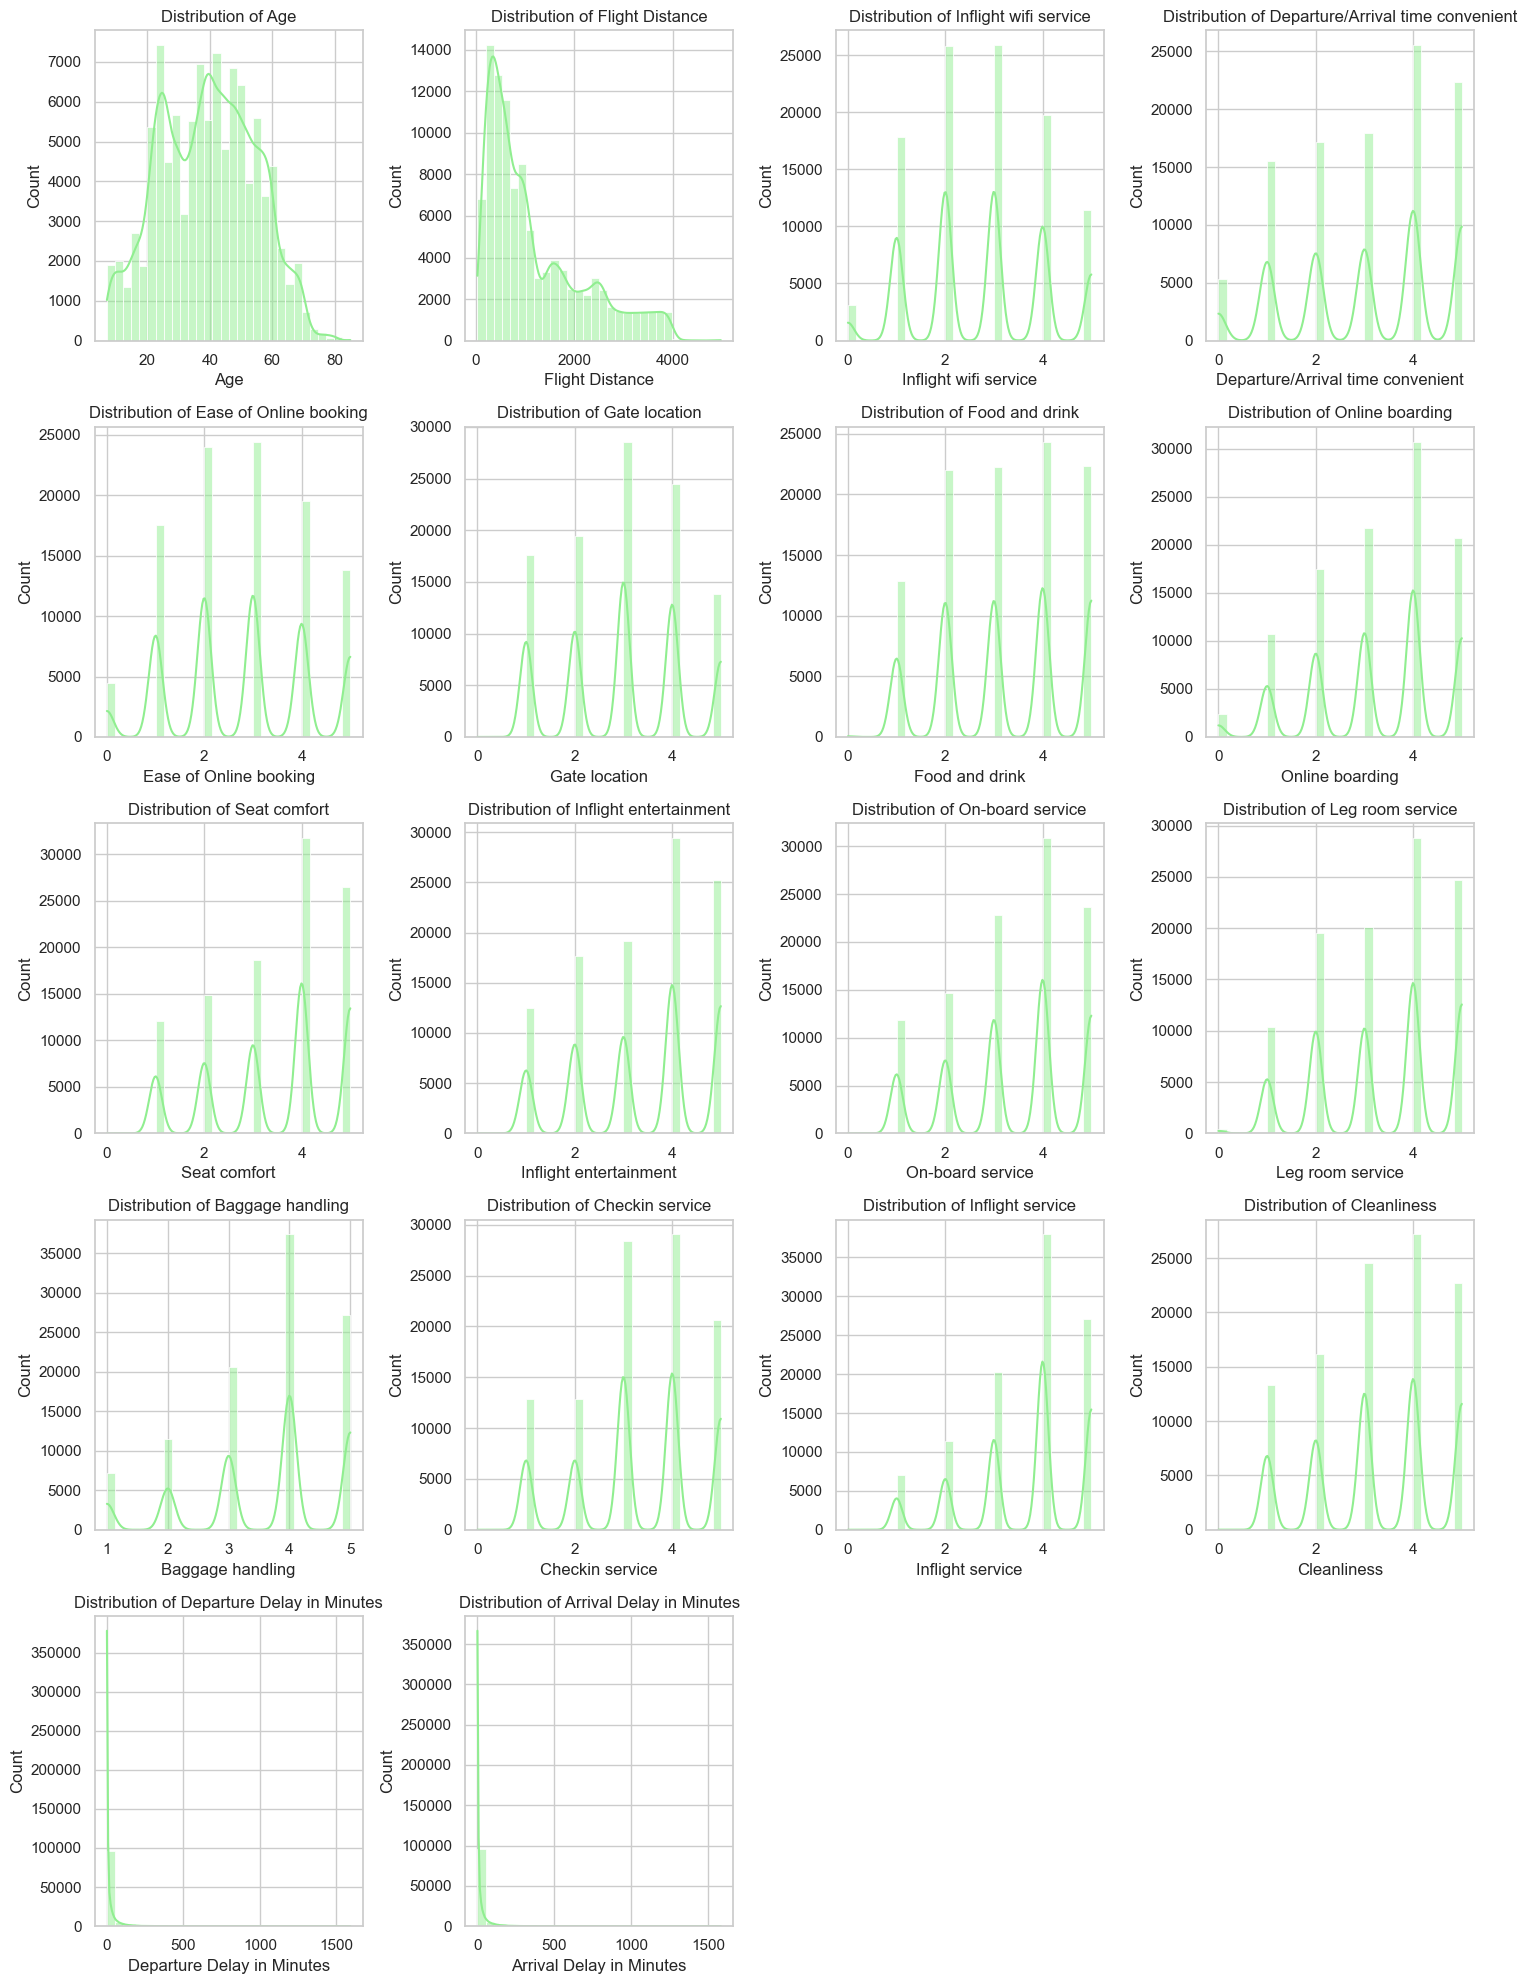

In [27]:
num_cols = train_set.select_dtypes(include=['float64', 'int64']).columns

cols = len(num_cols)
cols_per_row = 4
num_rows = int(np.ceil(cols / cols_per_row))

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(train_set[col], kde=True, bins=30, ax=axes[i], color='lightgreen')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Pairplot

In [ ]:
sns.pairplot(train_set, hue='satisfaction', markers=['o', 's'], palette='colorblind')
plt.show()

#### Correlation Matrix

In [ ]:
correlation_matrix = train_set[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

### Encoding and scaling

In [ ]:
encoder = OneHotEncoder()
scaler = StandardScaler()

cat_cols = train_set.select_dtypes(include=('object')).columns

train_set[cat_cols] = scaler.fit_transform(train_set[cat_cols])
val_set[cat_cols] = scaler.transform(val_set[cat_cols])
test_set[cat_cols] = scaler.transform(test_set[cat_cols])

train_set[num_cols] = scaler.fit_transform(train_set[num_cols])
val_set[num_cols] = scaler.transform(val_set[num_cols])
test_set[num_cols] = scaler.transform(test_set[num_cols])

In [ ]:
X_train, y_train = remove_labels(train_set, 'satisfaction')
X_val, y_val = remove_labels(val_set, 'satisfaction')
X_test, y_test = remove_labels(test_set, 'satisfaction')